<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/Momentum_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [ ]:
symbol = 'GLD'


try:
    # Fetch the stock price data from Yahoo Finance using yfinance
    gld = gld = yf.download(symbol, start='2019-01-01', end='2024-01-01')
    day = np.arange(1, len(gld) + 1)
    gld['day'] = day
    gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
    gld = gld[['day', 'Open', 'High','Low','Close']]
    print(gld)

except Exception as e:
    print(f"Error fetching data: {e}")



[*********************100%%**********************]  1 of 1 completed

             day        Open        High         Low       Close
Date                                                            
2019-01-02     1  121.349998  121.750000  120.879997  121.330002
2019-01-03     2  121.779999  122.459999  121.730003  122.430000
2019-01-04     3  121.320000  121.599998  120.690002  121.440002
2019-01-07     4  122.160004  122.220001  121.570000  121.860001
2019-01-08     5  121.150002  121.709999  121.059998  121.529999
...          ...         ...         ...         ...         ...
2023-12-22  1254  191.600006  191.880005  190.070007  190.270004
2023-12-26  1255  190.970001  191.740005  190.399994  191.720001
2023-12-27  1256  191.770004  193.179993  191.539993  192.589996
2023-12-28  1257  192.339996  192.889999  191.440002  191.470001
2023-12-29  1258  190.990005  191.639999  190.740005  191.169998

[1258 rows x 5 columns]


In [ ]:
#Info of the data frame extracted
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1258 non-null   int64  
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
#Add moving averages to the data frame

gld['9-day'] = gld['Close'].rolling(9).mean() #The fast moving average
gld['21-day'] = gld['Close'].rolling(21).mean() # The slow moving average

gld[19:25]

<ipython-input-4-438b5a1e23fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['9-day'] = gld['Close'].rolling(9).mean()
<ipython-input-4-438b5a1e23fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['21-day'] = gld['Close'].rolling(21).mean()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2019-01-30,20,123.910004,125.070000,123.699997,124.690002,122.418889,NaN
2019-01-31,21,125.180000,125.230003,124.620003,124.750000,122.712222,122.240476
2019-02-01,22,124.889999,125.050003,124.370003,124.500000,123.098889,122.391428
2019-02-04,23,123.989998,124.290001,123.820000,123.959999,123.377778,122.464285
2019-02-05,24,124.290001,124.419998,124.050003,124.279999,123.711111,122.599523
2019-02-06,25,124.160004,124.190002,123.400002,123.440002,123.972223,122.674761


In [ ]:
gld['signal'] = np.where(gld['9-day']>gld['21-day'],1,0) #signifies when to go long, which is when the 9-day moving average is more than the 21-day moving average
gld['signal'] = np.where(gld['9-day']<gld['21-day'],-1, gld['signal']) #signifies when to go short, which is when the 21-moving day average is more than the 9-day moving average
gld.dropna(inplace=True) #drops null value.
gld.head() #returns a few initial rows of the dataframe.

<ipython-input-5-e29c9bab9539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day']>gld['21-day'],1,0)
<ipython-input-5-e29c9bab9539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day']<gld['21-day'],-1, gld['signal'])
<ipython-input-5-e29c9bab9539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2019-01-31,21,125.180000,125.230003,124.620003,124.750000,122.712222,122.240476,1
2019-02-01,22,124.889999,125.050003,124.370003,124.500000,123.098889,122.391428,1
2019-02-04,23,123.989998,124.290001,123.820000,123.959999,123.377778,122.464285,1
2019-02-05,24,124.290001,124.419998,124.050003,124.279999,123.711111,122.599523,1
2019-02-06,25,124.160004,124.190002,123.400002,123.440002,123.972223,122.674761,1


In [ ]:
#Calculate conventional returns/model returns

gld['Return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['Return']
gld['entry'] = gld.signal.diff()
gld.head()

<ipython-input-7-d86178d24513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['Return'] = np.log(gld['Close']).diff()
<ipython-input-7-d86178d24513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['system_return'] = gld['signal'] * gld['Return']
<ipython-input-7-d86178d24513>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,day,Open,High,Low,Close,9-day,21-day,signal,Return,system_return,entry
Date,,,,,,,,,,,
2019-01-31,21,125.180000,125.230003,124.620003,124.750000,122.712222,122.240476,1,NaN,NaN,NaN
2019-02-01,22,124.889999,125.050003,124.370003,124.500000,123.098889,122.391428,1,-0.002006,-0.002006,0.0
2019-02-04,23,123.989998,124.290001,123.820000,123.959999,123.377778,122.464285,1,-0.004347,-0.004347,0.0
2019-02-05,24,124.290001,124.419998,124.050003,124.279999,123.711111,122.599523,1,0.002578,0.002578,0.0
2019-02-06,25,124.160004,124.190002,123.400002,123.440002,123.972223,122.674761,1,-0.006782,-0.006782,0.0


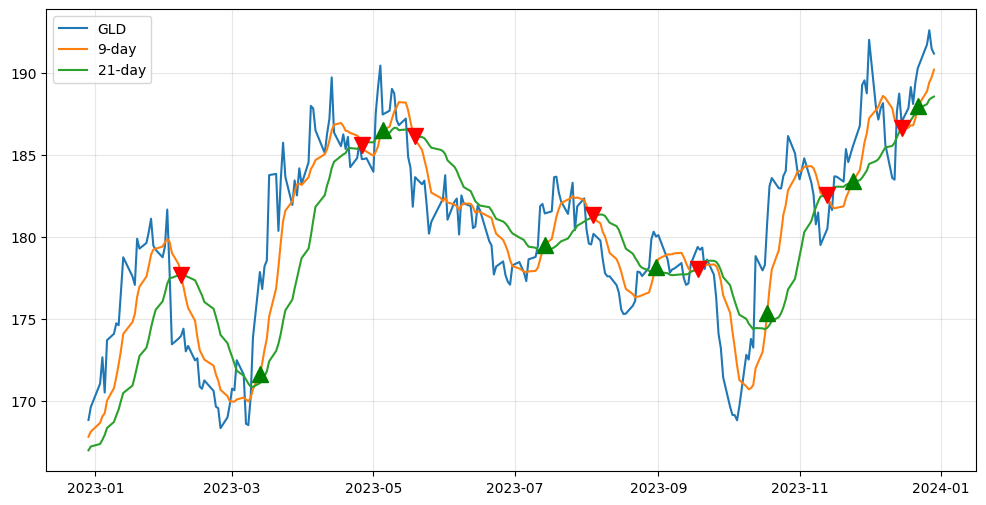

In [ ]:
#Plot trades on time series

plt.rcParams['figure.figsize'] = 12,6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252 :] ['Close'], label = 'GLD')
plt.plot(gld.iloc[-252 :] ['9-day'], label = '9-day')
plt.plot(gld.iloc[-252 :] ['21-day'], label = '21-day')

plt.plot(gld[-252 :].loc[gld.entry == 2].index, gld[-252 :]['9-day'][gld.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(gld[-252 :].loc[gld.entry == -2].index, gld[-252 :]['21-day'][gld.entry == -2], 'v', color ='r', markersize= 12)
plt.legend(loc=2);

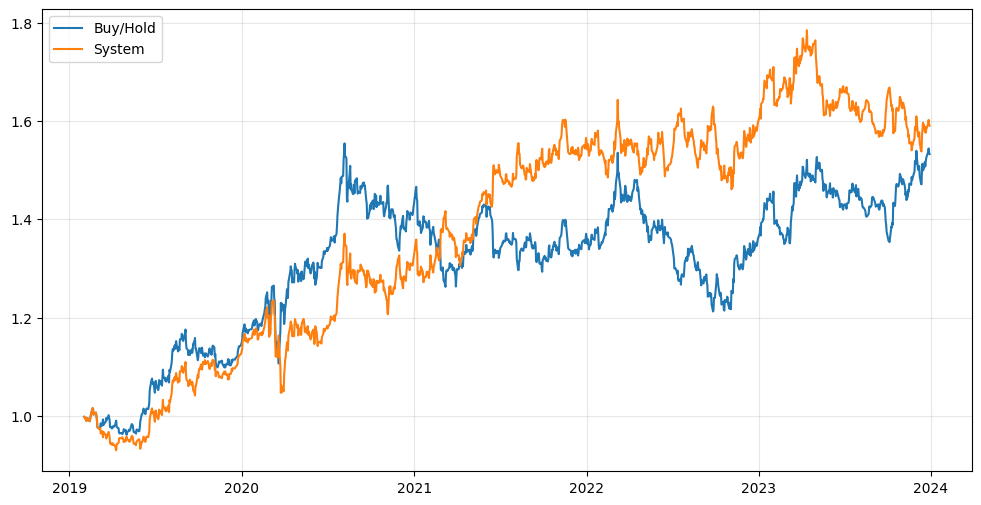

In [ ]:
#Plots the conventional return against the model's return
plt.plot(np.exp(gld['Return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label = 'System')
plt.legend(loc=2)
plt.grid(True, alpha = .3)

In [ ]:
np.exp(gld['Return']).cumprod()[-1]-1 #Cumulative return of the Buy/Hold

0.5324248350216072

In [ ]:
np.exp(gld['system_return']).cumprod()[-1]-1 #Cumulative return for the momentum algorithm

0.5902768256237729